In [ ]:
pip install tensorflow

In [2]:
pip install keras

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [129]:
labels = ['saree', 'jeans','trouser']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        print(path)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [130]:
train = get_data('Documents/scapped/')
val = get_data('Documents/scapped/')

Documents/scapped/saree
Documents/scapped/jeans
Documents/scapped/trouser


<ipython-input-129-a30125fa2846>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


Documents/scapped/saree
Documents/scapped/jeans
Documents/scapped/trouser


In [115]:
train

array([[array([[[217, 209, 198],
        [217, 209, 198],
        [217, 209, 198],
        ...,
        [160, 143, 135],
        [161, 144, 136],
        [174, 157, 149]],

       [[216, 208, 197],
        [216, 208, 197],
        [216, 208, 197],
        ...,
        [178, 161, 153],
        [182, 165, 157],
        [178, 161, 153]],

       [[215, 207, 196],
        [215, 207, 196],
        [215, 207, 196],
        ...,
        [180, 163, 155],
        [173, 156, 148],
        [173, 155, 148]],

       ...,

       [[ 43,  41,  44],
        [ 45,  41,  40],
        [ 38,  34,  22],
        ...,
        [200, 142,  52],
        [210, 150,  59],
        [220, 158,  65]],

       [[ 39,  38,  35],
        [ 38,  35,  28],
        [ 37,  33,  15],
        ...,
        [213, 158,  67],
        [214, 152,  58],
        [213, 148,  52]],

       [[ 39,  38,  31],
        [ 35,  33,  20],
        [ 41,  38,  13],
        ...,
        [212, 159,  68],
        [210, 147,  51],
        [216, 14

In [116]:
val

array([[array([[[217, 209, 198],
        [217, 209, 198],
        [217, 209, 198],
        ...,
        [160, 143, 135],
        [161, 144, 136],
        [174, 157, 149]],

       [[216, 208, 197],
        [216, 208, 197],
        [216, 208, 197],
        ...,
        [178, 161, 153],
        [182, 165, 157],
        [178, 161, 153]],

       [[215, 207, 196],
        [215, 207, 196],
        [215, 207, 196],
        ...,
        [180, 163, 155],
        [173, 156, 148],
        [173, 155, 148]],

       ...,

       [[ 43,  41,  44],
        [ 45,  41,  40],
        [ 38,  34,  22],
        ...,
        [200, 142,  52],
        [210, 150,  59],
        [220, 158,  65]],

       [[ 39,  38,  35],
        [ 38,  35,  28],
        [ 37,  33,  15],
        ...,
        [213, 158,  67],
        [214, 152,  58],
        [213, 148,  52]],

       [[ 39,  38,  31],
        [ 35,  33,  20],
        [ 41,  38,  13],
        ...,
        [212, 159,  68],
        [210, 147,  51],
        [216, 14

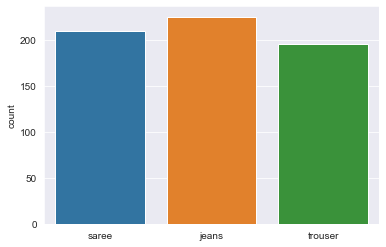

In [131]:
l = []
for i in train:
    #print(i[1])
    if(i[1] == 0):
        l.append("saree")
    if(i[1] == 1):
        l.append("jeans")
    if(i[1] == 2):
        l.append("trouser")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'saree')

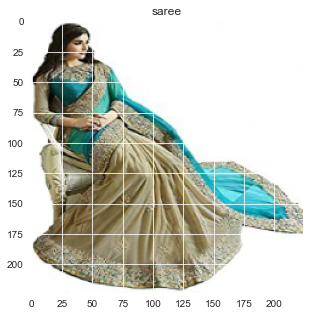

In [132]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'trouser')

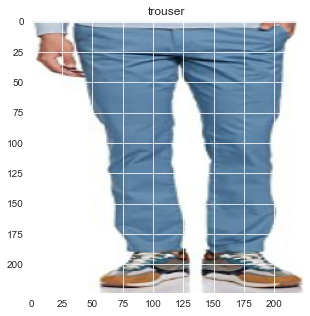

In [133]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

Text(0.5, 1.0, 'trouser')

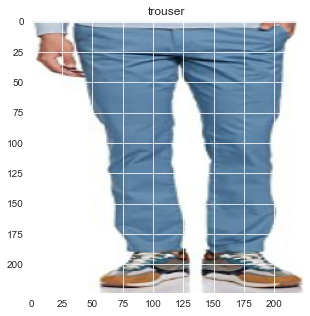

In [134]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [135]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

#x_val.reshape(-1, img_size, img_size, 1)
#y_val = np.array(y_val)

print(x_train)

[[[[0.85098039 0.81960784 0.77647059]
   [0.85098039 0.81960784 0.77647059]
   [0.85098039 0.81960784 0.77647059]
   ...
   [0.62745098 0.56078431 0.52941176]
   [0.63137255 0.56470588 0.53333333]
   [0.68235294 0.61568627 0.58431373]]

  [[0.84705882 0.81568627 0.77254902]
   [0.84705882 0.81568627 0.77254902]
   [0.84705882 0.81568627 0.77254902]
   ...
   [0.69803922 0.63137255 0.6       ]
   [0.71372549 0.64705882 0.61568627]
   [0.69803922 0.63137255 0.6       ]]

  [[0.84313725 0.81176471 0.76862745]
   [0.84313725 0.81176471 0.76862745]
   [0.84313725 0.81176471 0.76862745]
   ...
   [0.70588235 0.63921569 0.60784314]
   [0.67843137 0.61176471 0.58039216]
   [0.67843137 0.60784314 0.58039216]]

  ...

  [[0.16862745 0.16078431 0.17254902]
   [0.17647059 0.16078431 0.15686275]
   [0.14901961 0.13333333 0.08627451]
   ...
   [0.78431373 0.55686275 0.20392157]
   [0.82352941 0.58823529 0.23137255]
   [0.8627451  0.61960784 0.25490196]]

  [[0.15294118 0.14901961 0.1372549 ]
   [0.1

In [124]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
batch_size = 10

train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

In [136]:

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(0, activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 28, 28, 64)      

In [137]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history =  model.fit(x_train, y_train, validation_split=0.33, epochs=500, batch_size=10, verbose=0)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [440]:
#pip install tqdm